NOTE. This notebook is a work in progress.

Using a function with several minimas and generation of noisy data using it. 

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from scipy import optimize as opt
from matplotlib import pyplot as plt

In [3]:
import initdirs

from pdata.visualize import plot_contour
from pdata.visualize import plot_grad_as_vector_field
from pdata.optimize import eval_grad_on_meshgrid

$f(x, y) = sin(x) + (1 - y) sin(y) + 0.2 x^2 + 0.2 y^2 + 3$

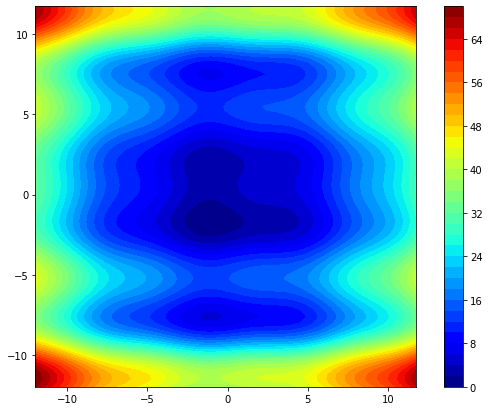

In [4]:
SIZE = 12

x_range = np.arange(-SIZE, SIZE, 0.25)
y_range = np.arange(-SIZE, SIZE, 0.25)
domain_xy = np.meshgrid(x_range, y_range)

def func(x):
    return np.sin(x[0]) + (1 - x[1]) * np.sin(x[1]) + 0.2 * x[0]**2 + 0.2 * x[1]**2 + 3

func_z = func(domain_xy)

_, ax = plt.subplots(figsize=(10, 7))

plot_contour(domain_xy[0], domain_xy[1], func_z, ax=ax, cmap='jet', levels=40)

plt.show()

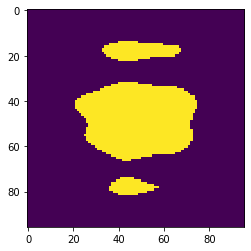

In [5]:
plt.imshow(func_z < 10, interpolation='none')
plt.show()

In [6]:
def generate_data(func, max_val, n_points, normal_std, random_state):
    
    def gen_factors():
        return np.random.random(n_points) * (2 * max_val) - max_val

    np.random.seed(random_state)
    noise = np.random.normal(scale=normal_std, size=n_points)

    np.random.seed(random_state)
    x0s = gen_factors()
    x1s = gen_factors()
    
    f_true = func([x0s, x1s])
    
    return pd.DataFrame({'x1': x0s, 'x2': x1s, 'resp': f_true})

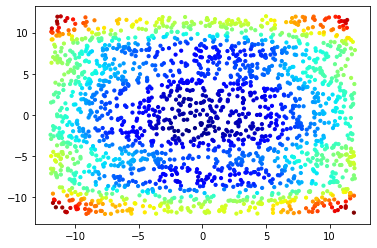

In [7]:
data = generate_data(func, max_val=SIZE, n_points=2000, normal_std=1.5, random_state=42)

plt.scatter(data.x1, data.x2, 10, c=data.resp, cmap='jet')
plt.show()

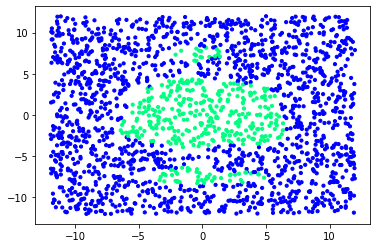

In [8]:
plt.scatter(data.x1, data.x2, 10, c=data.resp < 10, cmap='winter')
plt.show()